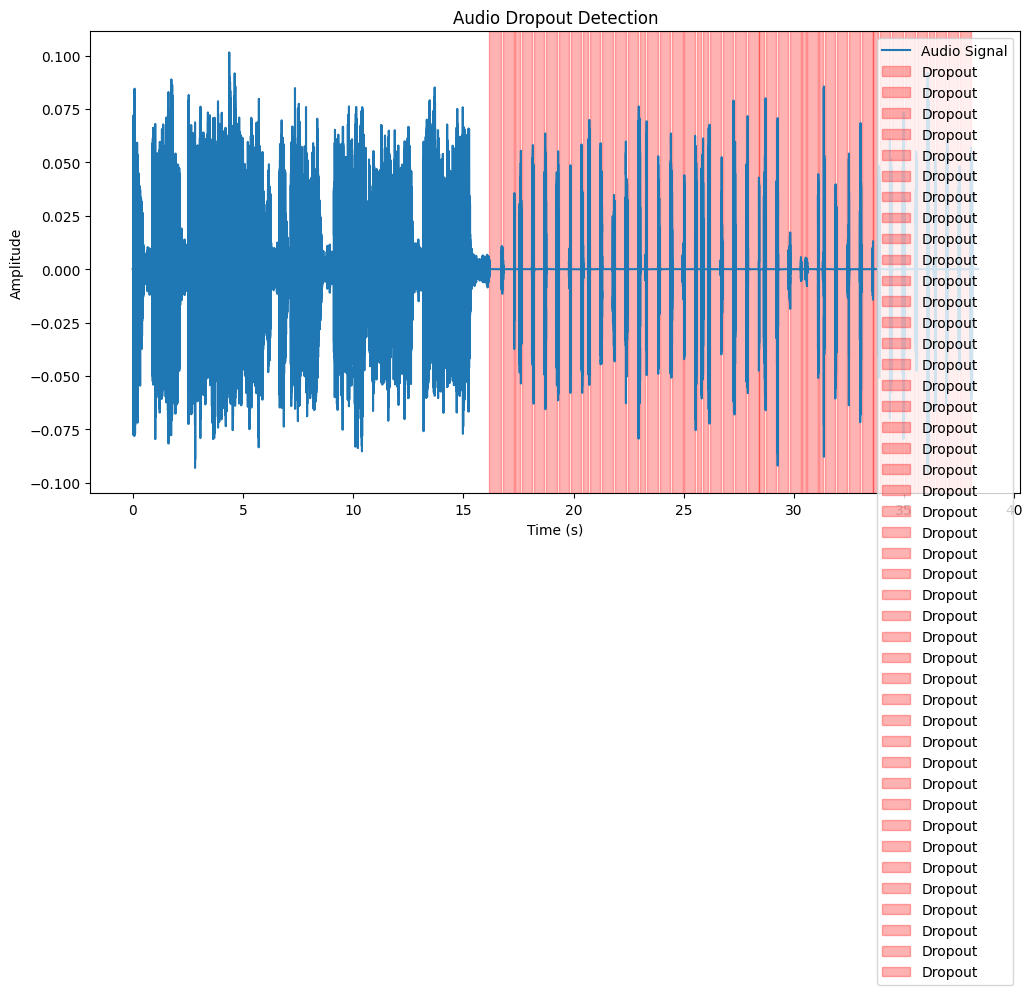

Detected Dropouts:
Dropout 1: Start = 16.19s, End = 16.73s, Duration = 0.54s
Dropout 2: Start = 16.82s, End = 17.31s, Duration = 0.49s
Dropout 3: Start = 17.33s, End = 17.56s, Duration = 0.22s
Dropout 4: Start = 17.66s, End = 18.11s, Duration = 0.46s
Dropout 5: Start = 18.21s, End = 18.67s, Duration = 0.46s
Dropout 6: Start = 18.77s, End = 19.23s, Duration = 0.47s
Dropout 7: Start = 19.32s, End = 19.79s, Duration = 0.47s
Dropout 8: Start = 19.87s, End = 20.35s, Duration = 0.48s
Dropout 9: Start = 20.45s, End = 20.66s, Duration = 0.21s
Dropout 10: Start = 20.75s, End = 21.22s, Duration = 0.47s
Dropout 11: Start = 21.31s, End = 21.78s, Duration = 0.47s
Dropout 12: Start = 21.88s, End = 22.36s, Duration = 0.48s
Dropout 13: Start = 22.46s, End = 22.94s, Duration = 0.48s
Dropout 14: Start = 23.03s, End = 23.25s, Duration = 0.22s
Dropout 15: Start = 23.33s, End = 23.83s, Duration = 0.50s
Dropout 16: Start = 23.93s, End = 24.39s, Duration = 0.47s
Dropout 17: Start = 24.49s, End = 24.95s, Dura

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
file_path = 'D:\\telelyzerv2\\experiment\\exp_data\\example of audio dropouts.mp3'  # Replace with your file path
audio, sr = librosa.load(file_path, sr=None)

# Convert -66 dB to a linear scale for silence threshold
silence_threshold = 10 ** (-66 / 20)  # approximately 0.0005
min_dropout_duration = 0.04  # Minimum duration of dropout in seconds (adjust as needed)
dropout_samples = int(min_dropout_duration * sr)  # Convert to samples

# Identify sections with low amplitude
dropouts = []
current_silence_duration = 0
for i, sample in enumerate(audio):
    if abs(sample) < silence_threshold:
        current_silence_duration += 1
    else:
        if current_silence_duration >= dropout_samples:
            start_time = (i - current_silence_duration) / sr
            end_time = i / sr
            dropouts.append((start_time, end_time))
        current_silence_duration = 0

# Plot the waveform and highlight dropouts
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(audio)) / sr, audio, label="Audio Signal")
for (start, end) in dropouts:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Dropout')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Dropout Detection")
plt.legend(loc="upper right")
plt.show()

# Print dropout times
if dropouts:
    print("Detected Dropouts:")
    for i, (start, end) in enumerate(dropouts, 1):
        print(f"Dropout {i}: Start = {start:.2f}s, End = {end:.2f}s, Duration = {end - start:.2f}s")
else:
    print("No dropouts detected.")
